In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf

# загружаем датасет в pandas dataframe
url = 'https://raw.githubusercontent.com/OlgaDidenko/share-price/main/MOEX_200331_230331.csv'
df = pd.read_csv(url, usecols=[7])

In [20]:
# извлекаем только столбец с ценой закрытия
data = df['<CLOSE>'].values
print(df.head())

   <CLOSE>
0    95.41
1    95.94
2    96.14
3    96.13
4    95.24


In [21]:
# разбиваем на обучающую и тестовую выборки
train_size = int(len(data) * 0.7)
train_data, test_data = data[:train_size], data[train_size:]

In [22]:
# создаем модель
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [23]:
# компилируем модель
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [24]:
# создаем входные и выходные данные для обучения
train_X, train_y = train_data[:-1], train_data[1:]
# создаем входные и выходные данные для тестирования
test_X, test_y = test_data[:-1], test_data[1:]

In [25]:
# изменяем форму входных данных
train_X = train_X.reshape((train_X.shape[0], 1))
test_X = test_X.reshape((test_X.shape[0], 1))


In [26]:
# обучаем модель
history = model.fit(train_X, train_y, epochs=100, batch_size=16, validation_data=(test_X, test_y), verbose=2)

Epoch 1/100
423/423 - 3s - loss: 1872.4490 - mae: 21.0731 - val_loss: 0.2874 - val_mae: 0.3834 - 3s/epoch - 8ms/step
Epoch 2/100
423/423 - 2s - loss: 0.8841 - mae: 0.5075 - val_loss: 0.2846 - val_mae: 0.3799 - 2s/epoch - 4ms/step
Epoch 3/100
423/423 - 2s - loss: 0.8833 - mae: 0.5081 - val_loss: 0.2955 - val_mae: 0.3932 - 2s/epoch - 4ms/step
Epoch 4/100
423/423 - 2s - loss: 0.8866 - mae: 0.5098 - val_loss: 0.2934 - val_mae: 0.3907 - 2s/epoch - 4ms/step
Epoch 5/100
423/423 - 1s - loss: 0.8866 - mae: 0.5104 - val_loss: 0.2636 - val_mae: 0.3524 - 1s/epoch - 3ms/step
Epoch 6/100
423/423 - 1s - loss: 0.8867 - mae: 0.5108 - val_loss: 0.3105 - val_mae: 0.4110 - 1s/epoch - 4ms/step
Epoch 7/100
423/423 - 2s - loss: 0.8887 - mae: 0.5115 - val_loss: 0.3022 - val_mae: 0.4012 - 2s/epoch - 4ms/step
Epoch 8/100
423/423 - 1s - loss: 0.8905 - mae: 0.5144 - val_loss: 0.2468 - val_mae: 0.3284 - 1s/epoch - 3ms/step
Epoch 9/100
423/423 - 1s - loss: 0.8907 - mae: 0.5148 - val_loss: 0.2742 - val_mae: 0.3666 -

In [27]:
# делаем прогноз на тестовых данных
predictions = model.predict(test_X)

91/91 [==============================] - 0s 2ms/step


In [28]:
# выводим прогнозы и фактические значения
for i in range(len(predictions)):
    print("Predicted: {:.2f}, Actual: {:.2f}".format(predictions[i][0], test_y[i]))

Predicted: 100.38, Actual: 99.81
Predicted: 100.28, Actual: 99.14
Predicted: 99.61, Actual: 99.03
Predicted: 99.50, Actual: 98.98
Predicted: 99.45, Actual: 98.78
Predicted: 99.25, Actual: 99.17
Predicted: 99.64, Actual: 99.32
Predicted: 99.79, Actual: 98.29
Predicted: 98.76, Actual: 97.75
Predicted: 98.21, Actual: 97.00
Predicted: 97.46, Actual: 97.21
Predicted: 97.67, Actual: 96.65
Predicted: 97.11, Actual: 95.95
Predicted: 96.41, Actual: 95.03
Predicted: 95.49, Actual: 94.73
Predicted: 95.18, Actual: 93.50
Predicted: 93.95, Actual: 91.80
Predicted: 92.25, Actual: 92.63
Predicted: 93.08, Actual: 92.81
Predicted: 93.26, Actual: 92.22
Predicted: 92.67, Actual: 92.68
Predicted: 93.13, Actual: 92.91
Predicted: 93.36, Actual: 92.91
Predicted: 93.36, Actual: 93.58
Predicted: 94.03, Actual: 93.65
Predicted: 94.10, Actual: 92.79
Predicted: 93.24, Actual: 93.34
Predicted: 93.79, Actual: 93.33
Predicted: 93.78, Actual: 92.93
Predicted: 93.38, Actual: 91.95
Predicted: 92.40, Actual: 91.46
Predic

In [29]:
print("MAE on test data: {:.2f}".format(history.history['val_mae'][-1]))


MAE on test data: 0.53


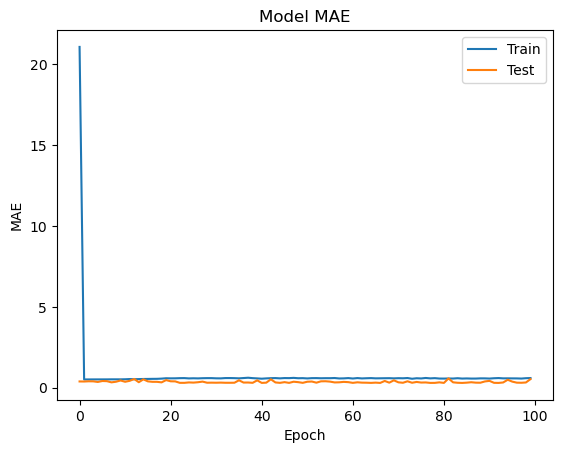

In [30]:
import matplotlib.pyplot as plt

# график обучения
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()